<h1><center> Lead Scoring Assignment<center></h1>

### Following steps are undertaken in this assignment

#### Step 1: Importing Data<br><br>Step 2: Inspecting the Dataframe<br><br>Step 3: Data Preparation and looking at correlations<br><br>Step 4: Test-Train Split<br><br>Step 5: Feature Scaling<br><br>Step 6: Logistic Regression Model<br><br>Step 7: Feature selection using RFE<br><br>Step 8: Plotting the ROC curve and Finding optimal cutoff point<br><br>Step 9: Making predictions on the test set

### Step 1: Importing Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd

# visulaisation
from matplotlib.pyplot import xticks
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the dataset
data = pd.read_csv('Leads.csv')
data.head() 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [3]:
# Checking the shape of the initial data set
data.shape

(9240, 37)

In [4]:
# Getting information regarding dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
# Describing the numerical data
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step 3: Data Preparation and looking at correlations

In [6]:
# Dropping 'Prospect ID' and 'Lead Number' columns as those are index columns, and we do not need them
data.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

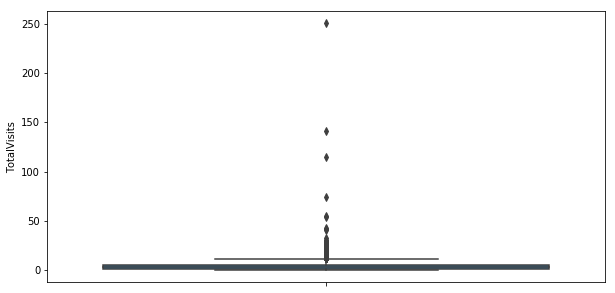

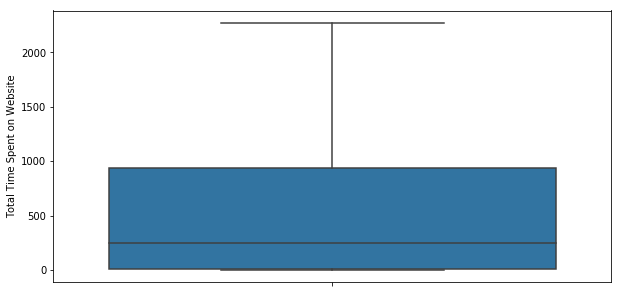

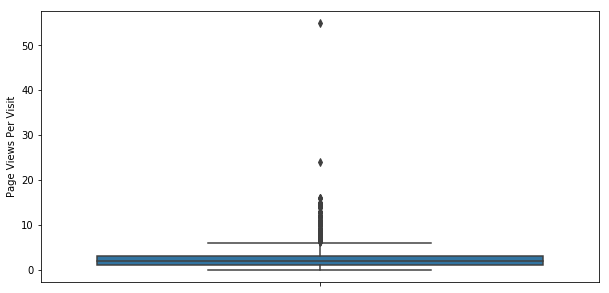

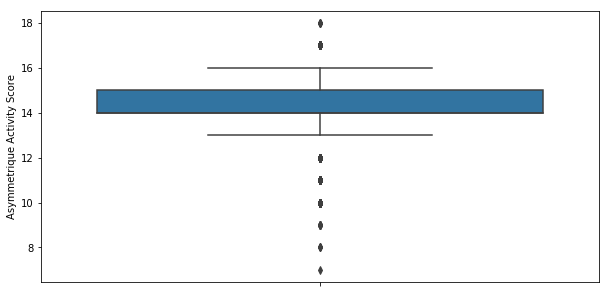

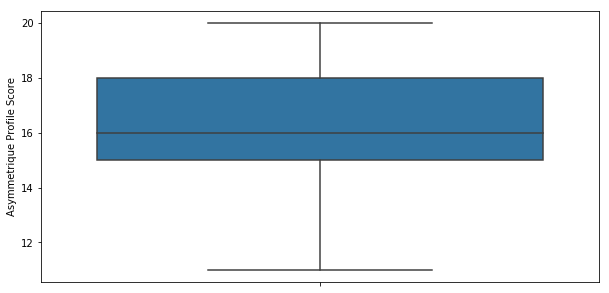

In [7]:
# Lets plot scatter plots of numeric data
for num_col in list(data._get_numeric_data().columns):
    if num_col not in ["Converted"]:
        plt.figure(figsize=(10,5))
        sns.boxplot(x=num_col, data=data, orient="v")
        plt.show()

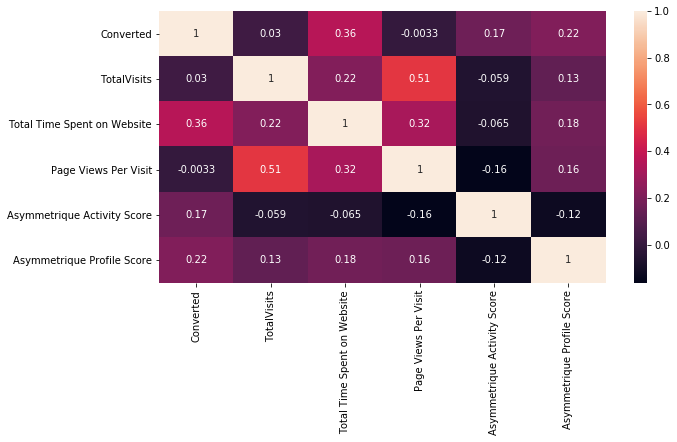

In [8]:
# Checking the correlations of various numeric variables
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [9]:
## 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit' column(s) contains outliers.
## So, doing statistically outlier treatment on these column
print("Shape before outlier treatment ", data.shape)

# 'TotalVisits' column treatment outlier
Q1 = data.TotalVisits.quantile(0.05)
Q3 = data.TotalVisits.quantile(0.95)
IQR = Q3 - Q1
data = data[(data.TotalVisits >= Q1 - 1.5*IQR) & (data.TotalVisits <= Q3 + 1.5*IQR)]

# 'Total Time Spent on Website' column treatment outlier
Q1 = data["Total Time Spent on Website"].quantile(0.05)
Q3 = data["Total Time Spent on Website"].quantile(0.95)
IQR = Q3 - Q1
data = data[(data["Total Time Spent on Website"] >= Q1 - 1.5*IQR) & (data["Total Time Spent on Website"] <= Q3 + 1.5*IQR)]

# 'Page Views Per Visit' column treatment outlier
Q1 = data["Page Views Per Visit"].quantile(0.05)
Q3 = data["Page Views Per Visit"].quantile(0.95)
IQR = Q3 - Q1
data = data[(data["Page Views Per Visit"] >= Q1 - 1.5*IQR) & (data["Page Views Per Visit"] <= Q3 + 1.5*IQR)]

print("Shape after outlier treatment ", data.shape)

Shape before outlier treatment  (9240, 35)
Shape after outlier treatment  (9077, 35)


In [10]:
## Lets view just categorically variables now
all_columns = data.columns
numeric_cols = list(data._get_numeric_data().columns)
categorical_cols = list(set(all_columns) - set(numeric_cols))
data[categorical_cols].head()

,Lead Origin,Magazine,Lead Source,Tags,Last Notable Activity,What is your current occupation,Asymmetrique Activity Index,Lead Quality,Through Recommendations,Do Not Call,...,City,Lead Profile,Last Activity,Specialization,X Education Forums,Newspaper,A free copy of Mastering The Interview,Digital Advertisement,Asymmetrique Profile Index,Do Not Email
0,API,No,Olark Chat,Interested in other courses,Modified,Unemployed,02.Medium,Low in Relevance,No,No,...,Select,Select,Page Visited on Website,Select,No,No,No,No,02.Medium,No
1,API,No,Organic Search,Ringing,Email Opened,Unemployed,02.Medium,NaN,No,No,...,Select,Select,Email Opened,Select,No,No,No,No,02.Medium,No
2,Landing Page Submission,No,Direct Traffic,Will revert after reading the email,Email Opened,Student,02.Medium,Might be,No,No,...,Mumbai,Potential Lead,Email Opened,Business Administration,No,No,Yes,No,01.High,No
3,Landing Page Submission,No,Direct Traffic,Ringing,Modified,Unemployed,02.Medium,Not Sure,No,No,...,Mumbai,Select,Unreachable,Media and Advertising,No,No,No,No,01.High,No
4,Landing Page Submission,No,Google,Will revert after reading the email,Modified,Unemployed,02.Medium,Might be,No,No,...,Mumbai,Select,Converted to Lead,Select,No,No,No,No,01.High,No


In [11]:
# Lets view the levels of categorical values
# Analysing categorical columns values
print("All Categorical columns values \n")
for col in categorical_cols:
    print(data[col].value_counts(), "\n")

All Categorical columns values 

Landing Page Submission    4866
API                        3573
Lead Add Form               607
Lead Import                  31
Name: Lead Origin, dtype: int64 

No    9077
Name: Magazine, dtype: int64 

Google               2862
Direct Traffic       2532
Olark Chat           1753
Organic Search       1149
Reference             442
Welingak Website      129
Referral Sites        122
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
youtubechannel          1
WeLearn                 1
blog                    1
testone                 1
welearnblog_Home        1
NC_EDM                  1
Pay per Click Ads       1
Name: Lead Source, dtype: int64 

Will revert after reading the email                  2033
Ringing                                              1185
Interested in other courses                           506
Already a

In [12]:
# As we can observe that there are select values for many column.
# This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.
## Also, 'unknown' value in 'Country' column is actually null

# Converting 'Select', and 'unknown' values to NaN.
data = data.replace('Select', np.nan)
data.replace(to_replace=r'^unknown$', value=np.nan, regex=True, inplace=True)

# Replacing values of columns which are in fact same and have typos in inputting data
data = data.replace('google', 'Google')

In [13]:
# After analyzing the levels of categorical variables, it was found that few categorical columns have either no variance, 
# or have very little variance.
# So, removing such columns as they will not add any value to the model
data.drop(['Newspaper', 'I agree to pay the amount through cheque', 'What matters most to you in choosing a course',
               'X Education Forums', 'Digital Advertisement', 'Magazine', 'Through Recommendations', 
               'Get updates on DM Content', 'Update me on Supply Chain Content', 'Do Not Call', 'Newspaper Article',
               'Search', 'Receive More Updates About Our Courses', 'Do Not Email'], axis=1, inplace=True)

In [14]:
## After analyzing the 'Country' column, it was identified that 6492/6779 (~95.8%) values are of India.
## So, lets replace all values apart from India as with 'Other' to simplify our dataset.
data['Country'].replace(to_replace=r'^(?!India)[A-Za-z_ /]*', value='Other', regex=True, inplace=True)
data.Country.value_counts()

India    6468
Other     281
Name: Country, dtype: int64

In [15]:
## Lets re-calculate categorically variables post our data cleaning steps
all_columns = data.columns
numeric_cols = list(data._get_numeric_data().columns)
categorical_cols = list(set(all_columns) - set(numeric_cols))

# Analysing categorical columns values post low variance clean up
print("All Categorical columns values \n")
for col in categorical_cols:
    print(data[col].value_counts(), "\n")

All Categorical columns values 

Online Search            802
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            68
Social Media              66
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64 

Mumbai                         3168
Thane & Outskirts               739
Other Cities                    677
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64 

Landing Page Submission    4866
API                        3573
Lead Add Form               607
Lead Import                  31
Name: Lead Origin, dtype: int64 

Potential Lead                 1554
Other Leads                     479
Student of SomeSchool           239
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64 

Google               2867
Dir

In [16]:
## After going through the count of various categorical values, it was found that alot of levels count is very less
## So, we can safely club such levels as they do not provide us any information
varList1 = ["Last Notable Activity", "Last Activity"]
varList2 = ["Lead Source"]

data[varList1] = data[varList1].replace(['Had a Phone Conversation', 'Email Marked Spam', 'View in browser link Clicked', 'Approached upfront', 
                        'Social Media', 'Email Received', 'Form Submitted on Website', 'Resubscribed to emails',
                        'Visited Booth in Tradeshow', 'Unreachable', 'Unsubscribed'], 'Others')

data[varList2] = data[varList2].replace(['Facebook', 'bing', 'Click2call', 'Social Media', 
                        'Live Chat', 'Press_Release', 'blog', 'Pay per Click Ads', 'testone',
                        'welearnblog_Home', 'WeLearn', 'youtubechannel', 'NC_EDM'], 'Others')

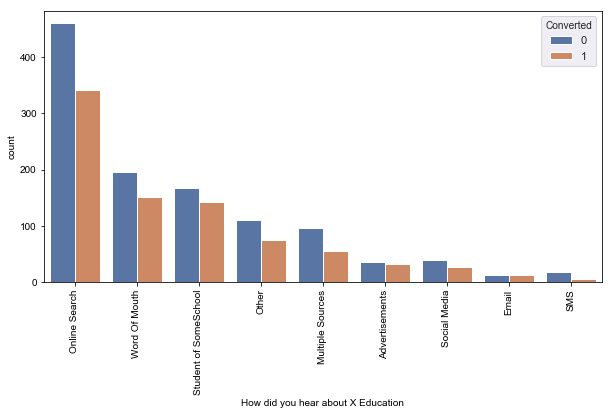

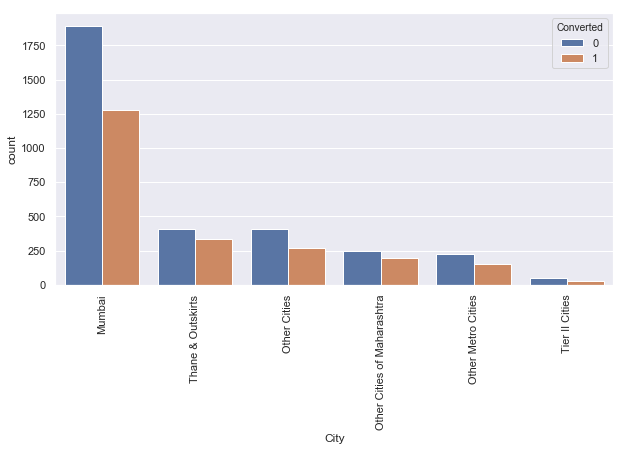

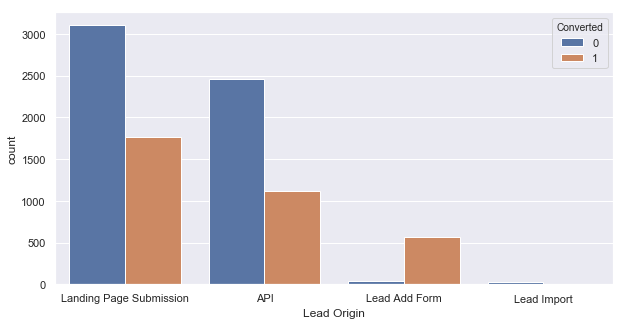

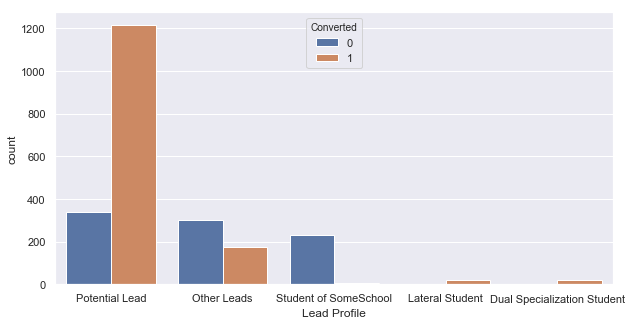

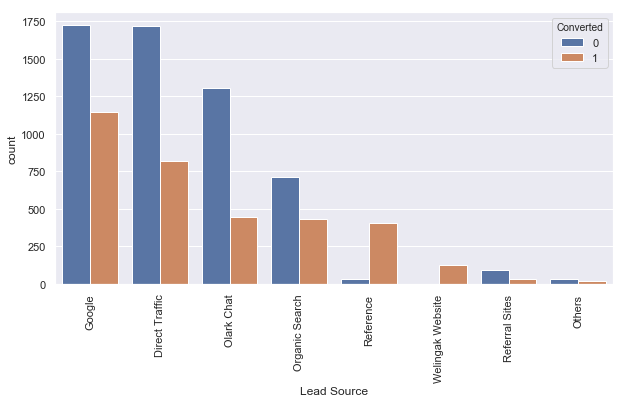

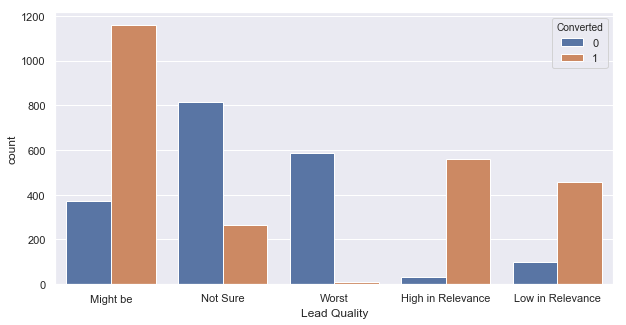

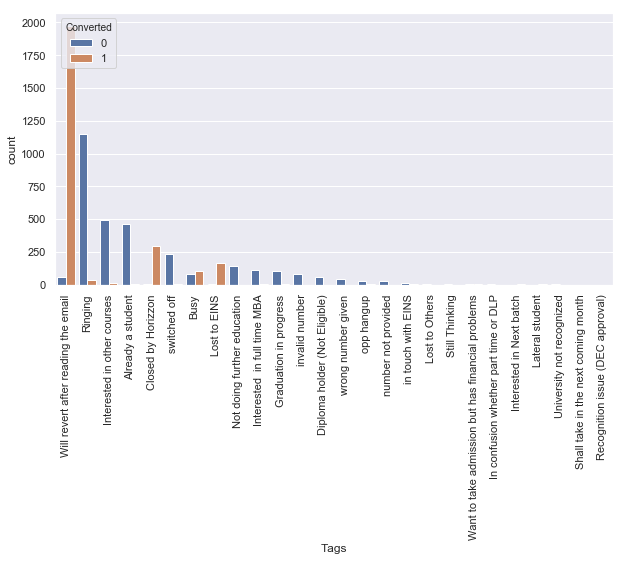

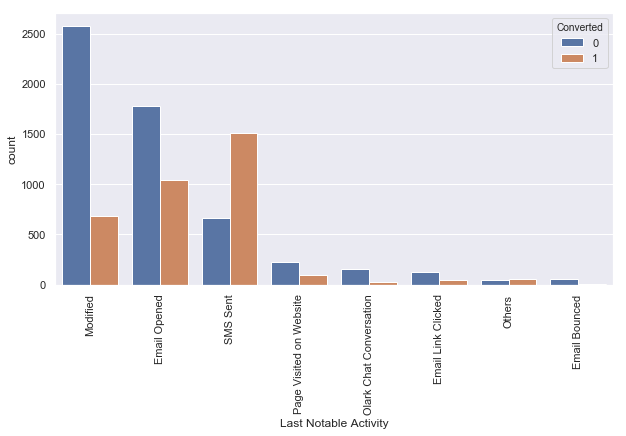

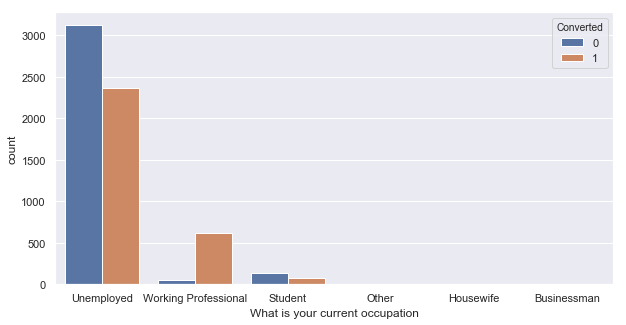

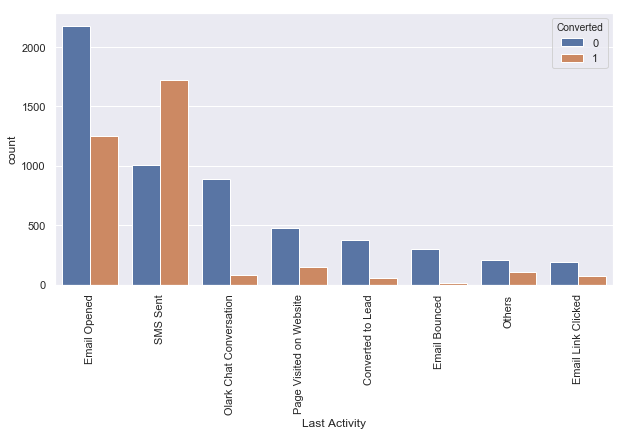

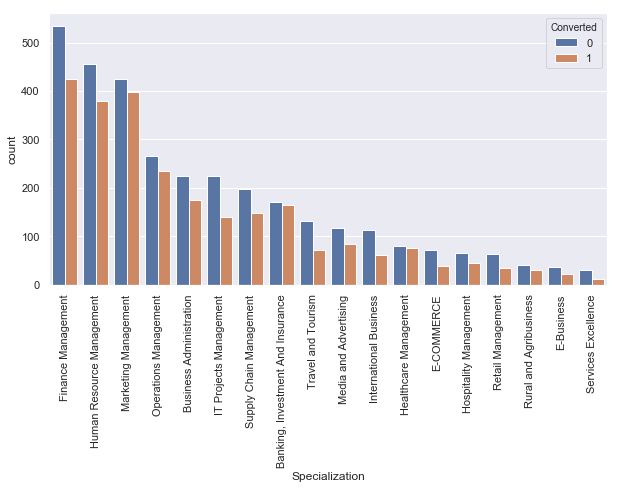

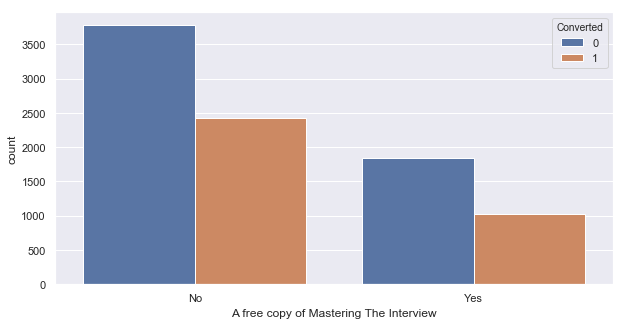

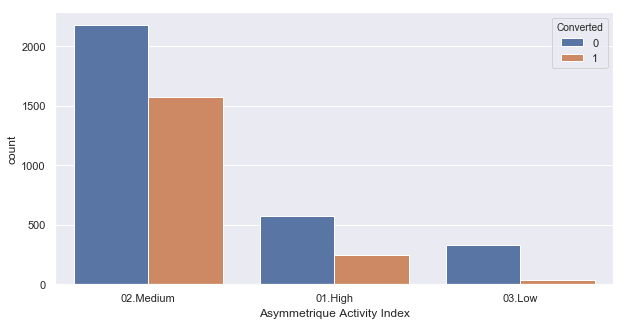

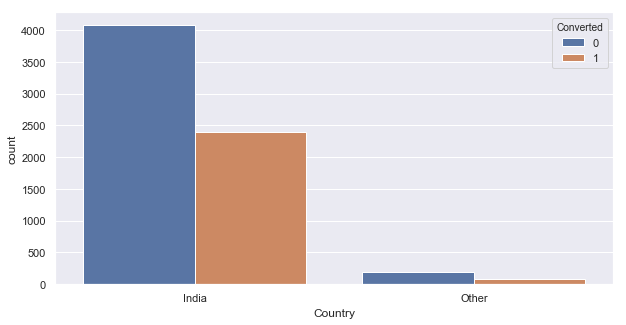

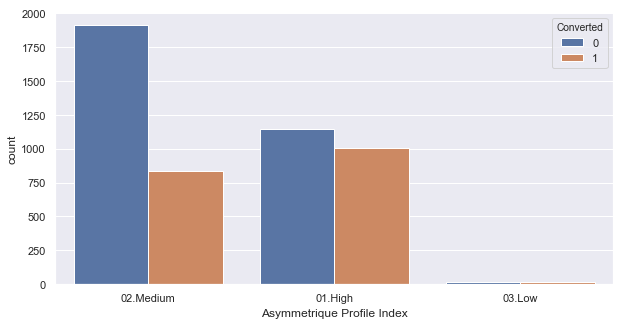

In [17]:
# Lets visualise categorical data across converted column
# Lets try to find out which value of which categorical column is highly correlated to 'Converted' (output) column
for col in categorical_cols:
    f, ax = plt.subplots(1, 1, figsize = (10, 5))
    sns.set(style="darkgrid")
    ax = sns.countplot(x=col, hue="Converted", data=data, order = data[col].value_counts().index)
    if col in ["Last Activity", "Last Notable Activity", "Tags", "Specialization", "Lead Source", 
              "How did you hear about X Education", "City"]:
        xticks(rotation = 90)
    plt.show()


### Null values imputation process

In [18]:
# Percentage of null values present in each column of dataset
round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Origin                                0.00
Lead Source                                0.32
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Country                                   25.65
Specialization                            36.33
How did you hear about X Education        78.18
What is your current occupation           29.48
Tags                                      36.61
Lead Quality                              51.97
Lead Profile                              74.52
City                                      39.62
Asymmetrique Activity Index               45.78
Asymmetrique Profile Index                45.78
Asymmetrique Activity Score               45.78
Asymmetrique Profile Score                45.78
A free copy of Mastering The Interview     0.00
Last Notable Activity                   

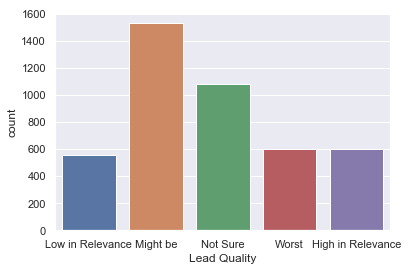

In [19]:
# Frequency plot of 'Lead Quality'
sns.countplot(data['Lead Quality'])

In [20]:
# As Lead quality is based on the intution of employee, so if left blank we can impute 'Not Sure' in NaN safely.
data['Lead Quality'] = data['Lead Quality'].replace(np.nan, 'Not Sure')

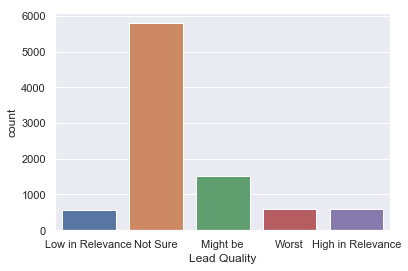

In [21]:
# Frequency plot of 'Lead Quality' after imputing null values
sns.countplot(data['Lead Quality'])

In [22]:
# Majority of the columns with valuable information contain high null values
# To ensure that such columns do not get deleted during null value imputation process,
# we will remove any column whose percentage of null values exceed 70% and not below that
# We will impute values of all other columns whose null values is less then 70%.
# Dropping columns who have 70% of missing data
data.drop(['Lead Profile', 'How did you hear about X Education'], axis=1, inplace=True)

In [23]:
## Imputing Categorical values
# 'Tags' is 'Will revert after reading the email' for most values so let's impute the same in missing values
data['Tags'] = data['Tags'].replace(np.nan, 'Will revert after reading the email')
# 'City' is 'Other Cities' for most values so let's impute the same in missing values
data['City'] = data['City'].replace(np.nan, 'Other Cities')
# 'What is your current occupation' is 'Unemployed' for most values so let's impute the same in missing values.
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')
# Country is India for most values so let's impute the same in missing values
data['Country'] = data['Country'].replace(np.nan, 'India')
# 'Asymmetrique Activity Index' is '02.Medium' for most values so lets impute the same in missing values
data['Asymmetrique Activity Index'] = data['Asymmetrique Activity Index'].replace(np.nan, '02.Medium')
# 'Asymmetrique Profile Index' is '02.Medium' for most values so lets impute the same in missing values
data['Asymmetrique Profile Index'] = data['Asymmetrique Profile Index'].replace(np.nan, '02.Medium')
# 'Specialization' is 'Finance Management' for most values so lets impute the same in missing values
data['Specialization'] = data['Specialization'].replace(np.nan, 'Finance Management')
# 'Lead Source' is 'Google' for most values so lets impute the same in missing values
data['Lead Source'] = data['Lead Source'].replace(np.nan, 'Google')


In [24]:
## Imputing numerical columns
# Imputing missing values of 'Asymmetrique Activity Score', 'Asymmetrique Profile Score' with mean
data.loc[np.isnan(data["Asymmetrique Profile Score"]), ['Asymmetrique Profile Score']] = data['Asymmetrique Profile Score'].mean()
data.loc[np.isnan(data["Asymmetrique Activity Score"]), ['Asymmetrique Activity Score']] = data['Asymmetrique Activity Score'].mean()


In [25]:
# Checking the number of null values across columns post null imputation process
data.isnull().sum(axis=0)

Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Country                                   0
Specialization                            0
What is your current occupation           0
Tags                                      0
Lead Quality                              0
City                                      0
Asymmetrique Activity Index               0
Asymmetrique Profile Index                0
Asymmetrique Activity Score               0
Asymmetrique Profile Score                0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [26]:
# Size of the dataset after null row imputation process
data.shape

(9077, 19)

<Figure size 1440x720 with 0 Axes>

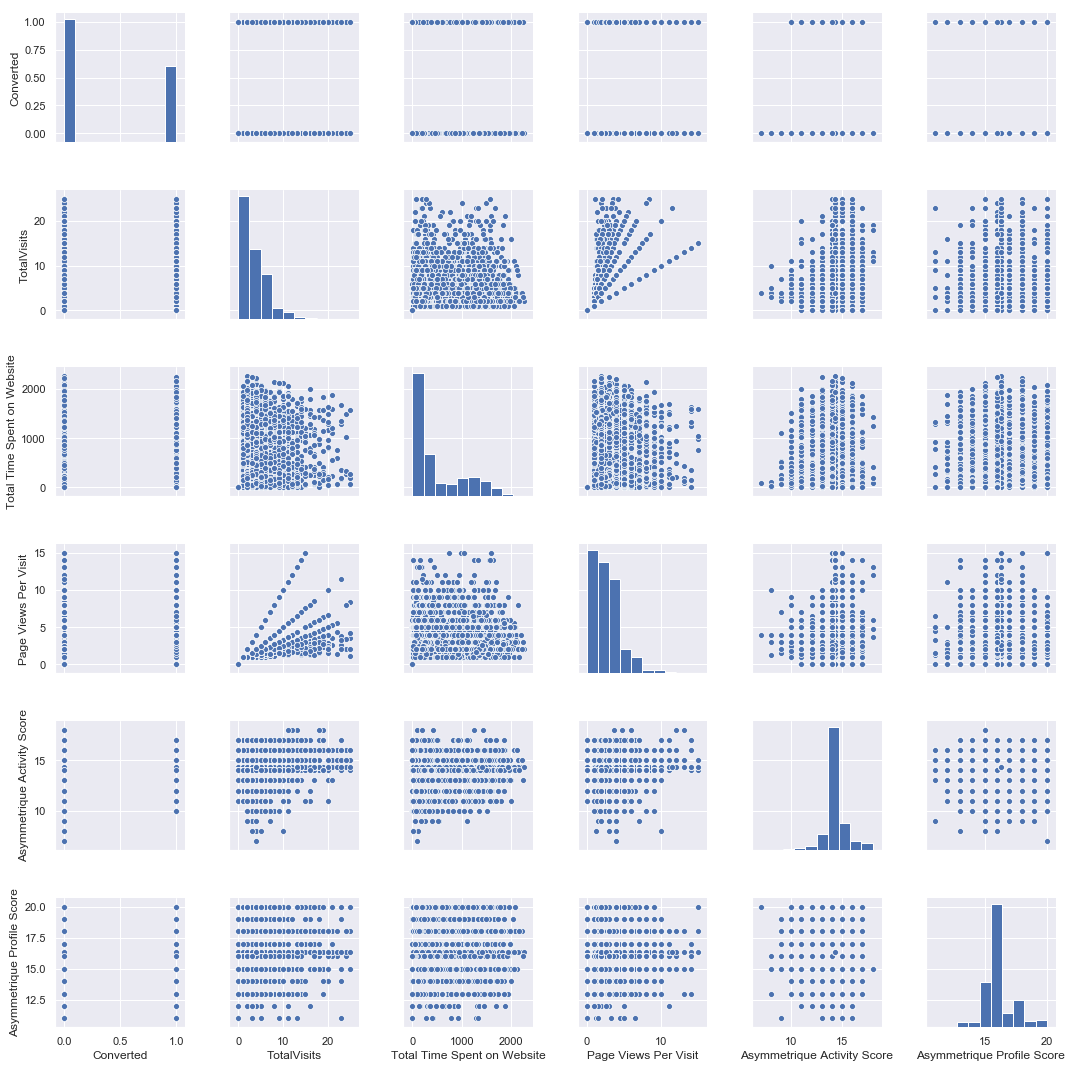

In [27]:
# Pairwise scatter plot
plt.figure(figsize=(20, 10))
sns.pairplot(data)
plt.show()

In [28]:
## Lets re-calculate final categorically variables level
all_columns = data.columns
numeric_cols = list(data._get_numeric_data().columns)
categorical_cols = list(set(all_columns) - set(numeric_cols))
data[categorical_cols].nunique()

City                                       6
Lead Origin                                4
Lead Source                                8
Lead Quality                               5
Tags                                      26
Last Notable Activity                      8
What is your current occupation            6
Last Activity                              8
Specialization                            18
A free copy of Mastering The Interview     2
Asymmetrique Activity Index                3
Country                                    2
Asymmetrique Profile Index                 3
dtype: int64

In [29]:
# Subset all categorical variables
data_categorical = data[categorical_cols].copy()
data_categorical.head()

,City,Lead Origin,Lead Source,Lead Quality,Tags,Last Notable Activity,What is your current occupation,Last Activity,Specialization,A free copy of Mastering The Interview,Asymmetrique Activity Index,Country,Asymmetrique Profile Index
0,Other Cities,API,Olark Chat,Low in Relevance,Interested in other courses,Modified,Unemployed,Page Visited on Website,Finance Management,No,02.Medium,India,02.Medium
1,Other Cities,API,Organic Search,Not Sure,Ringing,Email Opened,Unemployed,Email Opened,Finance Management,No,02.Medium,India,02.Medium
2,Mumbai,Landing Page Submission,Direct Traffic,Might be,Will revert after reading the email,Email Opened,Student,Email Opened,Business Administration,Yes,02.Medium,India,01.High
3,Mumbai,Landing Page Submission,Direct Traffic,Not Sure,Ringing,Modified,Unemployed,Others,Media and Advertising,No,02.Medium,India,01.High
4,Mumbai,Landing Page Submission,Google,Might be,Will revert after reading the email,Modified,Unemployed,Converted to Lead,Finance Management,No,02.Medium,India,01.High


In [30]:
# Convert into dummies for filtered categorical
data_dummies = pd.get_dummies(data_categorical, drop_first=True)
data_dummies.head()

,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,A free copy of Mastering The Interview_Yes,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Country_Other,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [31]:
# Drop categorical variable columns
data = data.drop(list(data_categorical.columns), axis=1)

In [32]:
# Concatenate dummy variables with X
data = pd.concat([data, data_dummies], axis=1)

In [33]:
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,A free copy of Mastering The Interview_Yes,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Country_Other,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
0,0,0.0,0,0.0,15.0,15.0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,5.0,674,2.5,15.0,15.0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,2.0,1532,2.0,14.0,20.0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,1.0,305,1.0,13.0,17.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,15.0,18.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Step 4: Test-Train Split

In [34]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = data.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,A free copy of Mastering The Interview_Yes,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Country_Other,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
0,0.0,0,0.0,15.0,15.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,5.0,674,2.5,15.0,15.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,2.0,1532,2.0,14.0,20.0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,1.0,305,1.0,13.0,17.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,15.0,18.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [35]:
# Putting response variable to y
y = data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [36]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [37]:
# Checking the conversion rate in the data set
conversion_rate = 100 * (sum(data['Converted']) / len(data['Converted'].index))
conversion_rate

38.05221989644156

In [38]:
# So current conversion rate in dataset is 38%. So, we don't have high data imbalance

### Step 5: Feature Scaling

In [39]:
# Create a list of the variables that we have to scale
varlist = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit', 'Asymmetrique Activity Score',
           'Asymmetrique Profile Score']

# Converting all numerics from int64 to float64 type to avoid warnings during Standard Scaling
X_train[varlist]=X_train[varlist].astype('float64')
X_train[varlist].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6353 entries, 7856 to 5749
Data columns (total 5 columns):
TotalVisits                    6353 non-null float64
Total Time Spent on Website    6353 non-null float64
Page Views Per Visit           6353 non-null float64
Asymmetrique Activity Score    6353 non-null float64
Asymmetrique Profile Score     6353 non-null float64
dtypes: float64(5)
memory usage: 297.8 KB


In [40]:
## Applying Feature Scaling

from sklearn.preprocessing import StandardScaler
# Create a scaling object
scaler = StandardScaler()

# Scale these variables using 'fit_transform'
X_train[varlist] = scaler.fit_transform(X_train[varlist])

In [1]:
# Checking the correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(X_train[varlist].corr(), annot=True)

NameError: name 'plt' is not defined

### Step 6: Logistic Regression Model

In [42]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Initial Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6353
Model:                            GLM   Df Residuals:                     6262
Model Family:                Binomial   Df Model:                           90
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 17 Nov 2019   Deviance:                          nan
Time:                        16:40:08   Pearson chi2:                 3.14e+18
No. Iterations:                   100   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   -1.07e+15   3.17e+07  -3.38e+07      0.000   -1.07e+15   -1.07e+15
TotalVisits                                             3.773e+13   1.29e+06   2.93e+07      0.000    3.77e+13    3.77e+13
Total Time Spent on Website                             2.034e+14   1.02e+06   1.99e+08      0.000    2.03e+14    2.03e+14
Page Views Per Visit                                   -5.446e+13   1.37e+06  -3.97e+07      0.000   -5.45e+13   -5.45e+13
Asymmetrique Activity Score                             1.781e+14   1.76e+06   1.01e+08      0.000    1.78e+14    1.78e+14
Asymmetrique Profile Score                              -5.08e+12   1.67e+06  -3.04e+06      0.000   -5.08e+12   -5.08e+12
City_Other Cities                                      -2.052e+13   2.91e+06  -7.05e+06      0.000   -2.05e+13   -2.05e+13
City_Other Cities of Maharashtra                       -2.766e+13   4.22e+06  -6.55e+06      0.000   -2.77e+13   -2.77e+13
City_Other Metro Cities                                -1.753e+13   4.51e+06  -3.89e+06      0.000   -1.75e+13   -1.75e+13
City_Thane & Outskirts                                 -1.341e+14   3.36e+06  -3.99e+07      0.000   -1.34e+14   -1.34e+14
City_Tier II Cities                                     2.121e+14   9.22e+06    2.3e+07      0.000    2.12e+14    2.12e+14
Lead Origin_Landing Page Submission                    -1.217e+14   3.38e+06   -3.6e+07      0.000   -1.22e+14   -1.22e+14
Lead Origin_Lead Add Form                               8.651e+14   1.47e+07   5.88e+07      0.000    8.65e+14    8.65e+14
Lead Origin_Lead Import                                 1.241e+13   2.04e+07   6.08e+05      0.000    1.24e+13    1.24e+13
Lead Source_Google                                      5.082e+13   2.85e+06   1.79e+07      0.000    5.08e+13    5.08e+13
Lead Source_Olark Chat                                 -1.617e+14   4.03e+06  -4.01e+07      0.000   -1.62e+14   -1.62e+14
Lead Source_Organic Search                              6.727e+13   3.24e+06   2.08e+07      0.000    6.73e+13    6.73e+13
Lead Source_Others                                     -1.681e+13    1.5e+07  -1.12e+06      0.000   -1.68e+13   -1.68e+13
Lead Source_Reference                                  -6.643e+14   1.53e+07  -4.35e+07      0.000   -6.64e+14   -6.64e+14
Lead Source_Referral Sites                              3.228e+14   8.49e+06    3.8e+07      0.000    3.23e+14    3.23e+14
Lead Source_Welingak Website                            4.077e+14   1.62e+07   2.51e+07      0.000    4.08e+14    4.08e+14
Lead Quality_Low in Relevance                          -1.225e+14    5.1e+06   -2.4e+07      0.000   -1.23e+14   -1.23e+14
Lead Quality_Might be                                  -3.169e+14   4.42e+06  -7.17e+07

### Step 7: Feature selection using RFE

In [43]:
# There are alot of variables having high p value, so instead of removing them one by one, lets emply RFE technique
# Importing necessary library and applying RFE
from sklearn.feature_selection import RFE
# running RFE with 15 variables as output
logreg=LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)
# Checking which of the columns were selected by RFE
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False,  True, False,  True,
       False,  True, False, False, False, False,  True, False,  True,
        True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [44]:
# Checking which columns were selected by RFE, along with their ranks
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 48),
 ('Total Time Spent on Website', False, 15),
 ('Page Views Per Visit', False, 47),
 ('Asymmetrique Activity Score', False, 13),
 ('Asymmetrique Profile Score', False, 63),
 ('City_Other Cities', False, 67),
 ('City_Other Cities of Maharashtra', False, 76),
 ('City_Other Metro Cities', False, 49),
 ('City_Thane & Outskirts', False, 54),
 ('City_Tier II Cities', False, 24),
 ('Lead Origin_Landing Page Submission', False, 26),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Lead Source_Google', False, 52),
 ('Lead Source_Olark Chat', False, 19),
 ('Lead Source_Organic Search', False, 65),
 ('Lead Source_Others', False, 60),
 ('Lead Source_Reference', False, 33),
 ('Lead Source_Referral Sites', False, 64),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Quality_Low in Relevance', False, 69),
 ('Lead Quality_Might be', False, 21),
 ('Lead Quality_Not Sure', True, 1),
 ('Lead Quality_Worst', True, 1),
 ('Tags_Busy', True, 

In [45]:
# Storing the selected columns
col = X_train.columns[rfe.support_]
# Checking which of the columns were not selected by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Quality_Low in Relevance',
       'Lead Quality_Might be', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Graduation in progress',
       'Tags_In confusion whether part time or DLP',
       'Tags_Interested  in full time MBA', 'Tags_Interested in Next batch',
       'Tags_Interested in other courses', 'Tags_Lateral student',
       'Tags_Lost to Others', 'Tags_Recognition issue (DEC approval)',
       'Tags_Shall take in the next coming 

In [46]:
# Building model with new columns that were selected by RFE
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6353
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1621.2
Date:                Sun, 17 Nov 2019   Deviance:                       3242.4
Time:                        16:40:12   Pearson chi2:                 3.00e+04
No. Iterations:                    24   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.4792      0.213     -6.959      0.000      -1.896      -1.063
Lead Origin_Lead Add Form                    1.6213      0.406      3.993      0.000       0.825       2.417
Lead Source_Welingak Website                 2.6938      0.843      3.194      0.001       1.041       4.347
Lead Quality_Not Sure                       -3.5754      0.124    -28.786      0.000      -3.819      -3.332
Lead Quality_Worst                          -4.2767      0.864     -4.949      0.000      -5.970      -2.583
Tags_Busy                                    3.5819      0.321     11.143      0.000       2.952       4.212
Tags_Closed by Horizzon                      7.5049      0.766      9.799      0.000       6.004       9.006
Tags_Lost to EINS                            9.0091      0.758     11.888      0.000       7.524      10.494
Tags_Not doing further education           -22.0818   1.88e+04     -0.001      0.999   -3.69e+04    3.68e+04
Tags_Ringing                                -1.9177      0.321     -5.980      0.000      -2.546      -1.289
Tags_Will revert after reading the email     3.5150      0.230     15.296      0.000       3.065       3.965
Tags_invalid number                        -23.5741   2.36e+04     -0.001      0.999   -4.62e+04    4.61e+04
Tags_number not provided                   -24.3078   4.28e+04     -0.001      1.000   -8.38e+04    8.38e+04
Tags_switched off                           -3.3562      0.778     -4.314      0.000      -4.881      -1.831
Last Notable Activity_SMS Sent               2.6825      0.117     22.924      0.000       2.453       2.912
Asymmetrique Activity Index_03.Low          -1.7961      0.378     -4.746      0.000      -2.538      -1.054
============================================================================================================
"""

In [47]:
# Getting the predicted probability on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7856    8.845108e-01
2257    3.154015e-03
851     8.845108e-01
7141    6.339959e-03
6337    1.828664e-13
3684    6.339959e-03
377     1.766090e-01
2919    9.367228e-04
1013    1.352429e-02
4292    1.766090e-01
dtype: float64

In [48]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([8.84510829e-01, 3.15401532e-03, 8.84510829e-01, 6.33995946e-03,
       1.82866449e-13, 6.33995946e-03, 1.76608959e-01, 9.36722799e-04,
       1.35242920e-02, 1.76608959e-01])

In [49]:
# Converting %age to actual value between 0 and 100, as per assignment requirement
y_train_pred_final = pd.DataFrame({'Lead':y_train.values, 'Lead_Score':y_train_pred*100})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Lead,Lead_Score,Prospect ID
0,1,8.845108e+01,7856
1,0,3.154015e-01,2257
2,1,8.845108e+01,851
3,0,6.339959e-01,7141
4,0,1.828664e-11,6337


In [50]:
# Creating a new column 'Predicted' with 1 if Lead_Score > 50 (imaginary number) else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score.map(lambda x: 1 if x > 50 else 0)

# Let's see the head of the dataset
y_train_pred_final.head()

,Lead,Lead_Score,Prospect ID,predicted
0,1,8.845108e+01,7856,1
1,0,3.154015e-01,2257,0
2,1,8.845108e+01,851,1
3,0,6.339959e-01,7141,0
4,0,1.828664e-11,6337,0


In [51]:
# Importing necessary libraries
from sklearn import metrics
# Creating Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
print(confusion)

[[3755  159]
 [ 353 2086]]


In [52]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.9194081536282072


In [53]:
# Check for the VIF values of the feature variables
# Importing required library
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Source_Welingak Website,1.33
4,Tags_Busy,1.12
5,Tags_Closed by Horizzon,1.12
12,Tags_switched off,1.11
7,Tags_Not doing further education,1.07
6,Tags_Lost to EINS,1.05
14,Asymmetrique Activity Index_03.Low,1.04
10,Tags_invalid number,1.03
11,Tags_number not provided,1.01
0,Lead Origin_Lead Add Form,0.60


### Manual fine tuning using p-values, and VIF(s)

In [54]:
# Dropping few variables with high p value. Its best to drop such models as they aren't helping much with prediction, and 
# unnecessarily making the model complex. The variable 'Tags_number not provided' has the highest p-value.
# So, let's start our model optimization process by removing it.
col = col.drop('Tags_number not provided',1)

In [55]:
# Let's re-run the model using the selected variables
X_train_sm_3 = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm_3, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6353
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1624.6
Date:                Sun, 17 Nov 2019   Deviance:                       3249.1
Time:                        16:40:13   Pearson chi2:                 2.97e+04
No. Iterations:                    24   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5656      0.214     -7.306      0.000      -1.986      -1.146
Lead Origin_Lead Add Form                    1.6328      0.406      4.021      0.000       0.837       2.429
Lead Source_Welingak Website                 2.6788      0.843      3.177      0.001       1.026       4.331
Lead Quality_Not Sure                       -3.5707      0.124    -28.766      0.000      -3.814      -3.327
Lead Quality_Worst                          -4.2398      0.868     -4.886      0.000      -5.941      -2.539
Tags_Busy                                    3.6747      0.322     11.421      0.000       3.044       4.305
Tags_Closed by Horizzon                      7.5865      0.766      9.899      0.000       6.084       9.089
Tags_Lost to EINS                            9.0858      0.758     11.984      0.000       7.600      10.572
Tags_Not doing further education           -22.0016   1.88e+04     -0.001      0.999   -3.69e+04    3.69e+04
Tags_Ringing                                -1.8151      0.320     -5.663      0.000      -2.443      -1.187
Tags_Will revert after reading the email     3.6012      0.231     15.567      0.000       3.148       4.055
Tags_invalid number                        -23.4720   2.36e+04     -0.001      0.999   -4.63e+04    4.62e+04
Tags_switched off                           -3.2505      0.778     -4.179      0.000      -4.775      -1.726
Last Notable Activity_SMS Sent               2.6618      0.116     22.901      0.000       2.434       2.890
Asymmetrique Activity Index_03.Low          -1.7856      0.379     -4.712      0.000      -2.528      -1.043
============================================================================================================
"""

In [56]:
# Predicting y
y_train_pred = res.predict(X_train_sm_3).values.reshape(-1)
y_train_pred[:10]

array([8.84486779e-01, 3.00216057e-03, 8.84486779e-01, 5.84518734e-03,
       1.92735929e-13, 5.84518734e-03, 1.77256998e-01, 9.56448744e-04,
       1.35255290e-02, 1.77256998e-01])

In [57]:
# Converting %age to actual value between 0 and 100, as per assignment requirement
y_train_pred_final['Lead_Score'] = y_train_pred*100

In [58]:
# Creating new column 'predicted' with 1 if Lead_Score > 50 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score.map(lambda x: 1 if x > 50 else 0)
y_train_pred_final.head()

,Lead,Lead_Score,Prospect ID,predicted
0,1,8.844868e+01,7856,1
1,0,3.002161e-01,2257,0
2,1,8.844868e+01,851,1
3,0,5.845187e-01,7141,0
4,0,1.927359e-11,6337,0


In [59]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.9190933417283174


In [60]:
# So the accuracy has not dropped much.
# Let(s) check the VIF(s) again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Source_Welingak Website,1.33
4,Tags_Busy,1.12
5,Tags_Closed by Horizzon,1.12
11,Tags_switched off,1.11
7,Tags_Not doing further education,1.07
6,Tags_Lost to EINS,1.05
13,Asymmetrique Activity Index_03.Low,1.04
10,Tags_invalid number,1.03
0,Lead Origin_Lead Add Form,0.60
3,Lead Quality_Worst,0.40


In [61]:
# Let's drop 'Tags_Not doing further education' since it has a high p-value
# Doing the same process again
col = col.drop('Tags_Not doing further education')

# Let's re-run the model using the selected variables
X_train_sm_4 = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm_4, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6353
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1627.6
Date:                Sun, 17 Nov 2019   Deviance:                       3255.1
Time:                        16:40:13   Pearson chi2:                 2.99e+04
No. Iterations:                    23   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.6771      0.212     -7.911      0.000      -2.093      -1.262
Lead Origin_Lead Add Form                    1.5695      0.394      3.981      0.000       0.797       2.342
Lead Source_Welingak Website                 2.7413      0.838      3.272      0.001       1.099       4.383
Lead Quality_Not Sure                       -3.5706      0.124    -28.760      0.000      -3.814      -3.327
Lead Quality_Worst                          -4.2471      0.866     -4.904      0.000      -5.945      -2.550
Tags_Busy                                    3.7841      0.321     11.806      0.000       3.156       4.412
Tags_Closed by Horizzon                      7.7031      0.766     10.062      0.000       6.203       9.204
Tags_Lost to EINS                            9.1976      0.758     12.138      0.000       7.712      10.683
Tags_Ringing                                -1.7040      0.319     -5.345      0.000      -2.329      -1.079
Tags_Will revert after reading the email     3.7126      0.229     16.179      0.000       3.263       4.162
Tags_invalid number                        -22.3644   1.43e+04     -0.002      0.999   -2.81e+04     2.8e+04
Tags_switched off                           -3.1426      0.777     -4.044      0.000      -4.666      -1.619
Last Notable Activity_SMS Sent               2.6655      0.116     22.936      0.000       2.438       2.893
Asymmetrique Activity Index_03.Low          -1.7825      0.379     -4.702      0.000      -2.526      -1.039
============================================================================================================
"""

In [62]:
# Prediction
y_train_pred = res.predict(X_train_sm_4).values.reshape(-1)
# Converting %age to actual value between 0 and 100, as per assignment requirement
y_train_pred_final['Lead_Score'] = y_train_pred*100
# Creating new column 'predicted' with 1 if Lead_Score > 50 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score.map(lambda x: 1 if x > 50 else 0)
y_train_pred_final.head()

,Lead,Lead_Score,Prospect ID,predicted
0,1,8.844773e+01,7856,1
1,0,2.666800e-01,2257,0
2,1,8.844773e+01,851,1
3,0,5.232003e-01,7141,0
4,0,5.181116e-11,6337,0


In [63]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.9194081536282072


In [64]:
# Overall accuracy has not dropped much
# Let(s) check the VIF(s) again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Source_Welingak Website,1.33
4,Tags_Busy,1.12
5,Tags_Closed by Horizzon,1.12
10,Tags_switched off,1.11
6,Tags_Lost to EINS,1.04
12,Asymmetrique Activity Index_03.Low,1.04
9,Tags_invalid number,1.03
0,Lead Origin_Lead Add Form,0.60
3,Lead Quality_Worst,0.37
2,Lead Quality_Not Sure,0.15


In [65]:
# Let's drop 'Tags_invalid number' since it has a high p value
# Doing the same process again
col = col.drop('Tags_invalid number')

# Let's re-run the model using the selected variables
X_train_sm_5 = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm_5, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6353
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1632.4
Date:                Sun, 17 Nov 2019   Deviance:                       3264.8
Time:                        16:40:14   Pearson chi2:                 2.98e+04
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.8050      0.214     -8.436      0.000      -2.224      -1.386
Lead Origin_Lead Add Form                    1.5907      0.395      4.027      0.000       0.817       2.365
Lead Source_Welingak Website                 2.7161      0.838      3.242      0.001       1.074       4.358
Lead Quality_Not Sure                       -3.5657      0.124    -28.746      0.000      -3.809      -3.323
Lead Quality_Worst                          -4.3153      0.860     -5.019      0.000      -6.000      -2.630
Tags_Busy                                    3.9221      0.321     12.237      0.000       3.294       4.550
Tags_Closed by Horizzon                      7.8252      0.766     10.214      0.000       6.324       9.327
Tags_Lost to EINS                            9.3275      0.759     12.296      0.000       7.841      10.814
Tags_Ringing                                -1.5540      0.318     -4.885      0.000      -2.177      -0.930
Tags_Will revert after reading the email     3.8415      0.231     16.626      0.000       3.389       4.294
Tags_switched off                           -2.9881      0.777     -3.847      0.000      -4.511      -1.466
Last Notable Activity_SMS Sent               2.6372      0.115     22.913      0.000       2.412       2.863
Asymmetrique Activity Index_03.Low          -1.7727      0.380     -4.670      0.000      -2.517      -1.029
============================================================================================================
"""

In [66]:
# Prediction
y_train_pred = res.predict(X_train_sm_5).values.reshape(-1)
# Converting %age to actual value between 0 and 100, as per assignment requirement
y_train_pred_final['Lead_Score'] = y_train_pred*100

# Creating new column 'predicted' with 1 if Lead_Score > 50 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score.map(lambda x: 1 if x > 50 else 0)
y_train_pred_final.head()

,Lead,Lead_Score,Prospect ID,predicted
0,1,88.457026,7856,1
1,0,0.219295,2257,0
2,1,88.457026,851,1
3,0,0.462941,7141,0
4,0,0.219295,6337,0


In [67]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.9189359357783724


In [68]:
# Overall accuracy has not dropped much
# Let(s) check the VIF(s) again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Source_Welingak Website,1.33
4,Tags_Busy,1.12
5,Tags_Closed by Horizzon,1.12
9,Tags_switched off,1.11
6,Tags_Lost to EINS,1.04
11,Asymmetrique Activity Index_03.Low,1.04
0,Lead Origin_Lead Add Form,0.60
3,Lead Quality_Worst,0.37
2,Lead Quality_Not Sure,0.15
7,Tags_Ringing,0.14


In [69]:
# VIF scores and p values looks good in the final model
# Calculating a fresh confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
print(confusion)

[[3752  162]
 [ 353 2086]]


### Step 8: Plotting the ROC curve and Finding optimal cutoff point

In [70]:
# Model is finalzed. Now, analysing various parameters
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

## Lets analyze the results in our assignment context
# True positives - Leads who got converted, and our model correctly predicted it
# True negatives - Leads who did not get converted, and our model also correctly predicted it
# False positives - Model predicted lead will be converted, but it did not convert
# False negatives - Model predicted lead will not be converted, but it did got converted

# Since, we have chosen random cutoff following parameters are not showing final values
# Once, final cut off rate is chosen, then we can compare our parameters against assignment (CEO) requirements

In [71]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8552685526855268

In [72]:
# Let us calculate specificity
TN / float(TN+FP)

0.9586101175268268

In [73]:
# Calculate false postive rate - predicting conversion when customer have have converted
print(FP/ float(TN+FP))

0.041389882473173226


In [74]:
# positive predictive value (Also referred as Precison)
print (TP / float(TP+FP))

0.9279359430604982


In [75]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr*100, tpr*100, label='ROC curve (area = %0.2f)' %auc_score )
    plt.plot([0, 100], [0, 100], 'k--')
    plt.xlim([0, 100])
    plt.ylim([0, 105])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [76]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Lead, y_train_pred_final.Lead_Score, drop_intermediate = False )

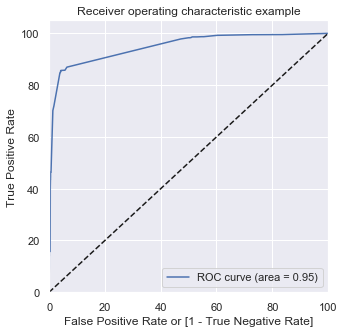

In [77]:
draw_roc(y_train_pred_final.Lead, y_train_pred_final.Lead_Score)

In [78]:
# Let's create columns with different Lead Score cutoffs 
numbers = [float(x)*10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Score.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead,Lead_Score,Prospect ID,predicted,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0
0,1,88.457026,7856,1,1,1,1,1,1,1,1,1,1,0
1,0,0.219295,2257,0,1,0,0,0,0,0,0,0,0,0
2,1,88.457026,851,1,1,1,1,1,1,1,1,1,1,0
3,0,0.462941,7141,0,1,0,0,0,0,0,0,0,0,0
4,0,0.219295,6337,0,1,0,0,0,0,0,0,0,0,0


In [79]:
# Now let's calculate accuracy sensitivity and specificity for various Lead Score cutoffs.
cutoff_df = pd.DataFrame( columns = ['Lead Score','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0,10,20,30,40,50,60,70,80,90]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

    Lead Score  accuracy     sensi     speci
0          0.0  0.383913  1.000000  0.000000
10        10.0  0.682670  0.983190  0.495401
20        20.0  0.910279  0.857729  0.943025
30        30.0  0.910279  0.857729  0.943025
40        40.0  0.918464  0.855269  0.957844
50        50.0  0.918936  0.855269  0.958610
60        60.0  0.917362  0.850349  0.959121
70        70.0  0.917362  0.847478  0.960910
80        80.0  0.877223  0.701927  0.986459
90        90.0  0.790178  0.462075  0.994635


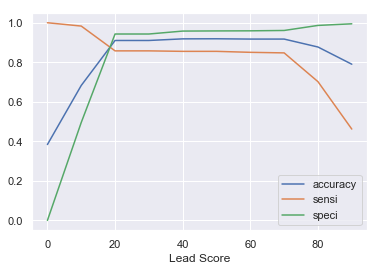

In [80]:
# Let's plot accuracy sensitivity and specificity for various Lead scores.
cutoff_df.plot.line(x='Lead Score', y=['accuracy','sensi','speci'])
plt.show()

In [81]:
# Choosing optimal cut off value based on graph
# Since the requirement of CEO is that atleast 80% True postive rate should be there, so choosing 19 value
# Increasing sensitivity at the expense of specificity
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Score.map( lambda x: 1 if x > 19 else 0)
y_train_pred_final.head()

,Lead,Lead_Score,Prospect ID,predicted,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,final_predicted
0,1,88.457026,7856,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.219295,2257,0,1,0,0,0,0,0,0,0,0,0,0
2,1,88.457026,851,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.462941,7141,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.219295,6337,0,1,0,0,0,0,0,0,0,0,0,0


In [82]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.final_predicted)

0.9105934204312923

In [83]:
# Creating fresh confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.final_predicted )
confusion2

array([[3664,  250],
       [ 318, 2121]], dtype=int64)

In [84]:
# Calculating fresh values based on confusion matrix
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

## Lets analyze the results in our assignment context
# True postives - Leads who got converted, and our model correctly predicted it
# True negatives - Leads who did not get converted, and our model also correctly predicted it
# False positives - Model predicted lead will be converted, but it did not convert
# False negatives - Model predicted lead will not be converted, but it did got converted

In [85]:
# Sensitivity - (Number of actual Yes correctly predicted / Total number of actual Yes)
# Let's see the sensitivity (True positive rate) of our logistic regression model
TP / float(TP+FN)

0.8696186961869619

In [86]:
# Specificity - (Number of actual No correctly predicted / Total number of actual No)
# Let us calculate specificity
TN / float(TN+FP)

0.9361267245784364

In [87]:
# Calculate false postive rate - predicting lead conversion when lead actually has not converted
print(FP/ float(TN+FP))

0.06387327542156362


In [88]:
# Positive predicted value (Precision)
# Probability that a predicted 'Yes' is actually a 'Yes'
print (TP / float(TP+FP))

0.8945592576971741


In [89]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9201406328478152


### Precision and Recall

In [90]:
# Precision - (TP / TP + FP)
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.8945592576971741

In [91]:
# Recall (TP / TP + FN)
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8696186961869619

In [92]:
# Using libraries for the parameters
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Lead, y_train_pred_final.final_predicted)

0.8945592576971741

In [93]:
# Recall
recall_score(y_train_pred_final.Lead, y_train_pred_final.final_predicted)

0.8696186961869619

### Precision and recall tradeoff

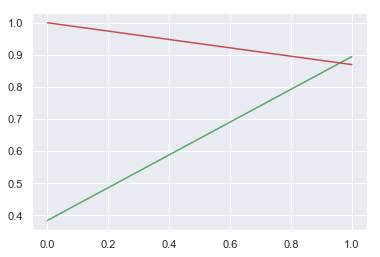

In [94]:
# Plotting Precision, and Recall tradeoff
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Lead, y_train_pred_final.final_predicted)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 9: Making predictions on the test set

In [95]:
# Copying list of the variables that we have to scale for test set
varlist = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit', 'Asymmetrique Activity Score',
           'Asymmetrique Profile Score']

# Converting all numerics from int64 to float64 type to avoid warnings during Standard Scaling
X_test[varlist]=X_test[varlist].astype('float64')
X_test[varlist].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2724 entries, 1342 to 7268
Data columns (total 5 columns):
TotalVisits                    2724 non-null float64
Total Time Spent on Website    2724 non-null float64
Page Views Per Visit           2724 non-null float64
Asymmetrique Activity Score    2724 non-null float64
Asymmetrique Profile Score     2724 non-null float64
dtypes: float64(5)
memory usage: 127.7 KB


In [96]:
# Applying feature scaling
X_test[varlist] = scaler.transform(X_test[varlist])
X_test = X_test[col]
X_test.head()

,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Lead Quality_Not Sure,Lead Quality_Worst,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_SMS Sent,Asymmetrique Activity Index_03.Low
1342,0,0,1,0,0,0,0,1,0,0,0,0
8169,0,0,1,0,0,0,0,1,0,0,1,0
1632,0,0,1,0,0,0,0,0,0,0,0,0
2743,0,0,1,0,0,0,0,1,0,0,0,0
6133,0,0,1,0,0,0,0,0,1,0,0,0


In [97]:
# Applying Logistic Model on the test set
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
# Converting y_pred to a dataframe which is an array
# Multiplying by 100 to get a score between 0, and 100
y_pred_1 = pd.DataFrame(y_test_pred * 100)
# Checking the head
y_pred_1.head()

,0
1342,0.098229
8169,1.355367
1632,0.462941
2743,0.098229
6133,17.810601


In [98]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting index
y_test_df['Index'] = y_test_df.index

In [99]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [100]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [101]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Index,0
0,1,1342,0.098229
1,0,8169,1.355367
2,0,1632,0.462941
3,0,2743,0.098229
4,0,6133,17.810601


In [102]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Score'})

In [103]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Index','Converted','Lead_Score'], axis=1)
y_pred_final.head()

,Index,Converted,Lead_Score
0,1342,1,0.098229
1,8169,0,1.355367
2,1632,0,0.462941
3,2743,0,0.098229
4,6133,0,17.810601


In [104]:
# Predicting conversion rate on the test set
y_pred_final['final_predicted'] = y_pred_final.Lead_Score.map(lambda x: 1 if x > 19 else 0)
y_pred_final.head()

,Index,Converted,Lead_Score,final_predicted
0,1342,1,0.098229,0
1,8169,0,1.355367,0
2,1632,0,0.462941,0
3,2743,0,0.098229,0
4,6133,0,17.810601,0


In [105]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9137298091042585

In [106]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1615,   94],
       [ 141,  874]], dtype=int64)

In [107]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [108]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8610837438423645

In [109]:
# Let us calculate specificity
TN / float(TN+FP)

0.9449970743124634

## End of Assignment